In [ ]:
# Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.core.common import random_state
from numpy import mean, std


#### **Loading the Dataset**

In [ ]:
# Reading in the CSV file

power_consumption = pd.read_csv('/content/household_power_consumption.txt', delimiter=';',
                               parse_dates={'TimeStamp' : ['Date', 'Time']},
                                infer_datetime_format=True, low_memory=False, index_col='TimeStamp')



In [ ]:
# # Reading in the CSV file

# power_consumption = pd.read_csv('household_power_consumption.txt', delimiter=';',
#                                parse_dates={'TimeStamp' : ['Date', 'Time']},
#                                 infer_datetime_format=True, low_memory=False, index_col='TimeStamp')

In [ ]:
power_consumption.shape

(2075259, 7)

In [ ]:
power_consumption.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
TimeStamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


##### **Sampling a subset of the data**
Taking a random sample from the population.

In [ ]:
# Sampling 10,000 records randomly

power_sample = power_consumption.sample(n=5000, random_state=42)

In [ ]:
power_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
TimeStamp,,,,,,,
2010-07-07 18:10:00,0.256,0.106,242.000,1.200,0.000,0.000,1.0
2007-05-14 06:50:00,0.466,0.352,237.220,2.400,0.000,2.000,0.0
2007-09-26 18:10:00,0.758,0.194,238.660,3.200,0.000,1.000,0.0
2007-06-19 07:30:00,1.290,0.046,240.640,5.400,1.000,0.000,18.0
2010-05-10 04:43:00,0.428,0.202,242.230,1.800,0.000,2.000,1.0


In [ ]:
power_sample.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
TimeStamp,,,,,,,
2008-09-18 00:34:00,0.248,0.124,242.770,1.200,0.000,2.000,1.0
2007-03-22 17:07:00,0.294,0.106,243.030,1.200,0.000,1.000,0.0
2008-03-14 18:57:00,2.860,0.046,234.800,12.200,0.000,4.000,17.0
2010-11-08 02:43:00,0.448,0.210,240.240,2.000,0.000,1.000,0.0
2007-05-06 22:05:00,3.252,0.086,229.510,14.200,0.000,0.000,16.0


In [ ]:
power_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2010-07-07 18:10:00 to 2007-05-06 22:05:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    5000 non-null   object 
 1   Global_reactive_power  5000 non-null   object 
 2   Voltage                5000 non-null   object 
 3   Global_intensity       5000 non-null   object 
 4   Sub_metering_1         5000 non-null   object 
 5   Sub_metering_2         5000 non-null   object 
 6   Sub_metering_3         4925 non-null   float64
dtypes: float64(1), object(6)
memory usage: 312.5+ KB


#### **Data Cleaning and Preprocessing**

In [ ]:
# Checking for null values

power_sample.isnull().sum()

Global_active_power       0
Global_reactive_power     0
Voltage                   0
Global_intensity          0
Sub_metering_1            0
Sub_metering_2            0
Sub_metering_3           75
dtype: int64

In [ ]:
## Some of the values in certain columns are represented by '?'

power_sample = power_sample.replace('?', np.nan)

In [ ]:
power_sample.isnull().sum()

Global_active_power      75
Global_reactive_power    75
Voltage                  75
Global_intensity         75
Sub_metering_1           75
Sub_metering_2           75
Sub_metering_3           75
dtype: int64

In [ ]:
power_sample = power_sample.astype(np.float64).fillna(method='bfill')

In [ ]:
power_sample.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
power_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2010-07-07 18:10:00 to 2007-05-06 22:05:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    5000 non-null   float64
 1   Global_reactive_power  5000 non-null   float64
 2   Voltage                5000 non-null   float64
 3   Global_intensity       5000 non-null   float64
 4   Sub_metering_1         5000 non-null   float64
 5   Sub_metering_2         5000 non-null   float64
 6   Sub_metering_3         5000 non-null   float64
dtypes: float64(7)
memory usage: 312.5 KB


In [ ]:
# Renaming the sub_metering columns to household usage units

power_sample.rename(columns={
    'Sub_metering_1': 'Kitchen_Use',
    'Sub_metering_2': 'Laundry_Use',
    'Sub_metering_3': 'Heating_Use'}, inplace=True)

In [ ]:
# Deriving a column for energy readings unaccounted for

power_sample['Unaccounted_Use'] = power_sample['Global_active_power'] * 1000 / 60 - \
                                              power_sample['Kitchen_Use'] - power_sample['Laundry_Use'] - power_sample['Heating_Use']


In [ ]:
# Combining all four energy readings to derive a column for total usage

power_sample['Total_Household_Consumption'] = power_sample['Kitchen_Use'] + \
                                               power_sample['Laundry_Use'] + \
                                               power_sample['Heating_Use'] + \
                                               power_sample['Unaccounted_Use']


In [ ]:
# Deriving variables for different time intervals

power_sample['hour_of_day'] = power_sample.index.hour

power_sample['day_of_week'] = power_sample.index.dayofweek

power_sample['month_of_year'] = power_sample.index.month

power_sample['season'] = power_sample.index.month % 12 // 3

In [ ]:
power_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2010-07-07 18:10:00 to 2007-05-06 22:05:00
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Global_active_power          5000 non-null   float64
 1   Global_reactive_power        5000 non-null   float64
 2   Voltage                      5000 non-null   float64
 3   Global_intensity             5000 non-null   float64
 4   Kitchen_Use                  5000 non-null   float64
 5   Laundry_Use                  5000 non-null   float64
 6   Heating_Use                  5000 non-null   float64
 7   Unaccounted_Use              5000 non-null   float64
 8   Total_Household_Consumption  5000 non-null   float64
 9   hour_of_day                  5000 non-null   int64  
 10  day_of_week                  5000 non-null   int64  
 11  month_of_year                5000 non-null   int64  
 12  season                       5000 non-nu

#### Outlier Detection and Removal

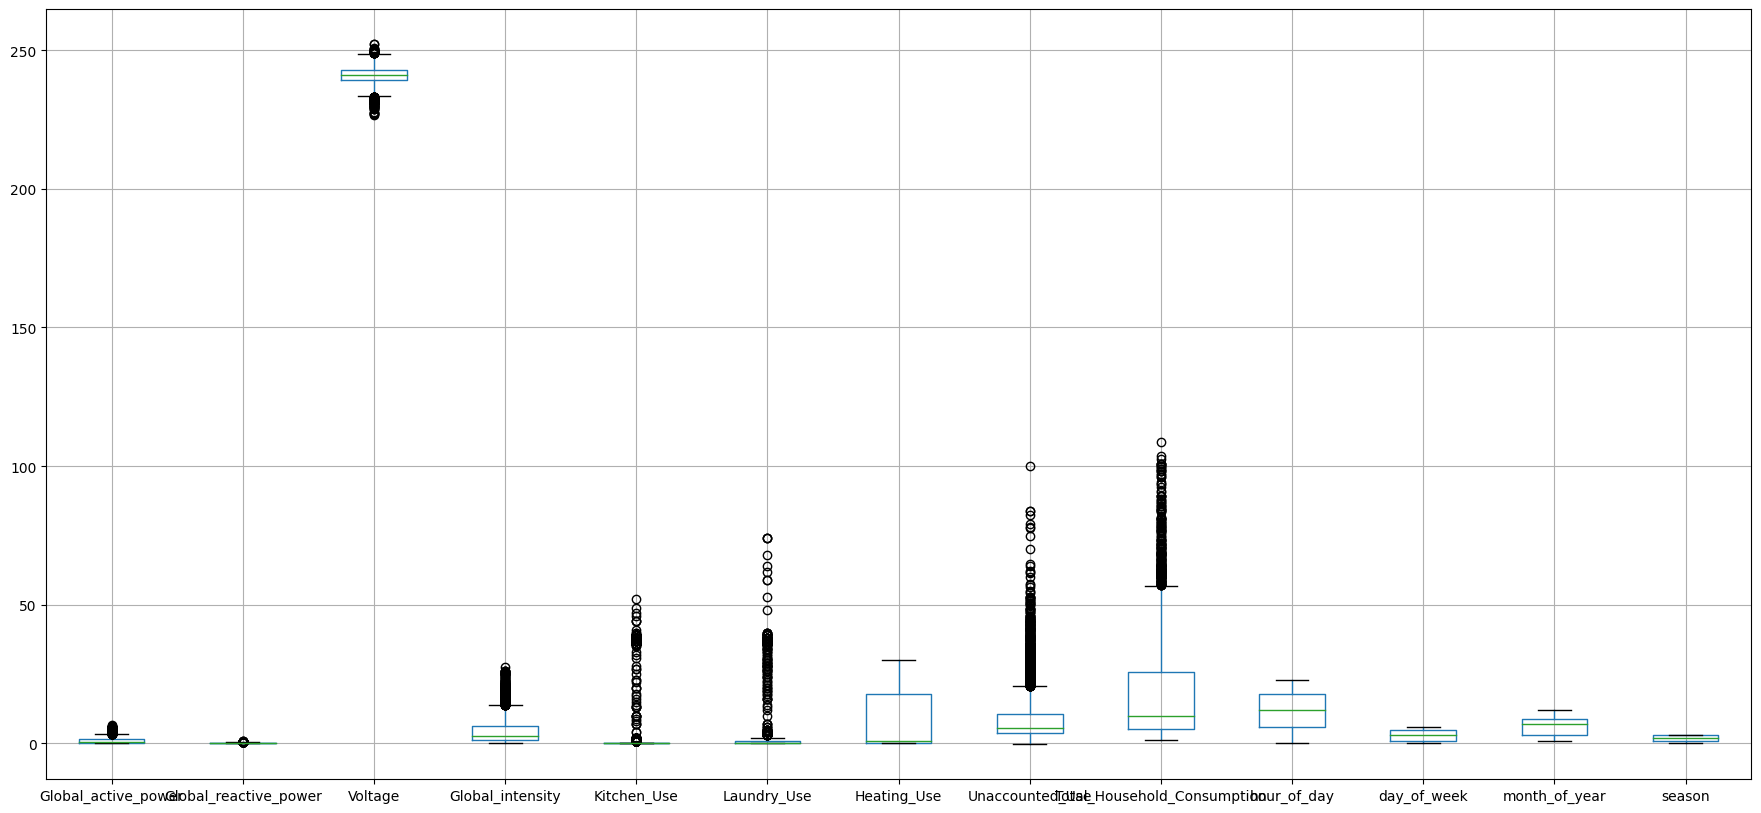

In [ ]:
# Checking for outliers

plt.figure(figsize=(22, 10))
power_sample.boxplot();

In [ ]:
# # calculating the quartiles
# Q1 = power_sample.quantile(0.25)

# Q3 = power_sample.quantile(0.75)

# IQR = Q3 - Q1

# power_sample = power_sample[~((power_sample < (Q1 - 1.5 * IQR)) | (power_sample > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Creating a list to store outlier percentages for each column
outlier_percentages = []

numerical_features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                     'Kitchen_Use', 'Laundry_Use', 'Heating_Use', 'Unaccounted_Use', 'Total_Household_Consumption']


# Iterating over each column
for column in numerical_features:
    data = power_sample[column]

    # Calculating mean and standard deviation
    column_mean, column_std = mean(data), std(data)

    # Setting threshold for identifying outliers
    cut_off = column_std * 3
    lower, upper = column_mean - cut_off, column_mean + cut_off

    print(f'{column}: \n')

    # Identifying and removing the outliers
    outliers = data[(data < lower) | (data > upper)]
    power_sample = power_sample[(data >= lower) & (data <= upper)]

    # Counting and printing identified outliers
    num_out = len(outliers)
    print(f'Identified outliers: {num_out}')

    # Removing the outliers and counting non-outlier observations
    outliers_removed = data[(data >= lower) & (data <= upper)]
    num_nout = len(outliers_removed)
    print(f'Non-outlier observations: {num_nout}')

    # Calculating and printing percentage of outliers
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')

    # Storing outlier percentage for the current column
    outlier_percentages.append(outlier_percent)


Global_active_power: 

Identified outliers: 91
Non-outlier observations: 4909
Percent of outliers: 1.82 

Global_reactive_power: 

Identified outliers: 59
Non-outlier observations: 4850
Percent of outliers: 1.2018741087797924 

Voltage: 

Identified outliers: 39
Non-outlier observations: 4811
Percent of outliers: 0.8041237113402062 

Global_intensity: 

Identified outliers: 79
Non-outlier observations: 4732
Percent of outliers: 1.6420702556641031 

Kitchen_Use: 

Identified outliers: 61
Non-outlier observations: 4671
Percent of outliers: 1.2890955198647505 

Laundry_Use: 

Identified outliers: 71
Non-outlier observations: 4600
Percent of outliers: 1.520017126953543 

Heating_Use: 

Identified outliers: 0
Non-outlier observations: 4600
Percent of outliers: 0.0 

Unaccounted_Use: 

Identified outliers: 109
Non-outlier observations: 4491
Percent of outliers: 2.3695652173913047 

Total_Household_Consumption: 

Identified outliers: 22
Non-outlier observations: 4469
Percent of outliers: 0.48

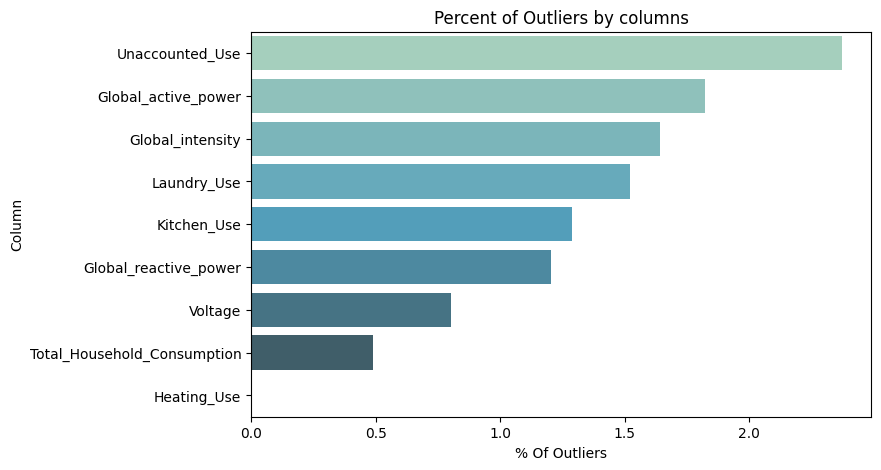

In [ ]:
# Visualizing the identified outliers, their columns and percentages

plt.figure(figsize=(8, 5))

outliers = pd.DataFrame({'Feature': numerical_features, '% Of Outliers': outlier_percentages})

sns.barplot(data=outliers.sort_values('% Of Outliers', ascending=False), y='Feature', x='% Of Outliers', palette='GnBu_d')

plt.title('Percent of Outliers by columns')
plt.ylabel('Column')
plt.show()

#### **Exploratory Analysis and Visualization**

In [ ]:
power_sample.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_Use,Laundry_Use,Heating_Use,Unaccounted_Use,Total_Household_Consumption,hour_of_day,day_of_week,month_of_year,season
count,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000
mean,0.844708,0.111535,241.263345,3.571448,0.065339,0.368986,6.010964,7.633177,14.078466,11.166704,2.965540,6.471694,1.538152
std,0.690434,0.100177,2.966417,2.852128,0.390384,0.719740,8.300269,6.491620,11.507234,6.902194,1.995894,3.394650,1.113194
min,0.078000,0.000000,231.490000,0.200000,0.000000,0.000000,0.000000,-0.233333,1.300000,0.000000,0.000000,1.000000,0.000000
25%,0.292000,0.000000,239.520000,1.200000,0.000000,0.000000,0.000000,3.666667,4.866667,5.000000,1.000000,4.000000,1.000000
50%,0.454000,0.094000,241.350000,2.200000,0.000000,0.000000,1.000000,5.233333,7.566667,11.000000,3.000000,7.000000,2.000000
75%,1.400000,0.182000,243.100000,5.800000,0.000000,1.000000,17.000000,8.533333,23.333333,17.000000,5.000000,9.000000,3.000000
max,2.972000,0.452000,250.340000,12.600000,10.000000,12.000000,30.000000,32.733333,49.533333,23.000000,6.000000,12.000000,3.000000


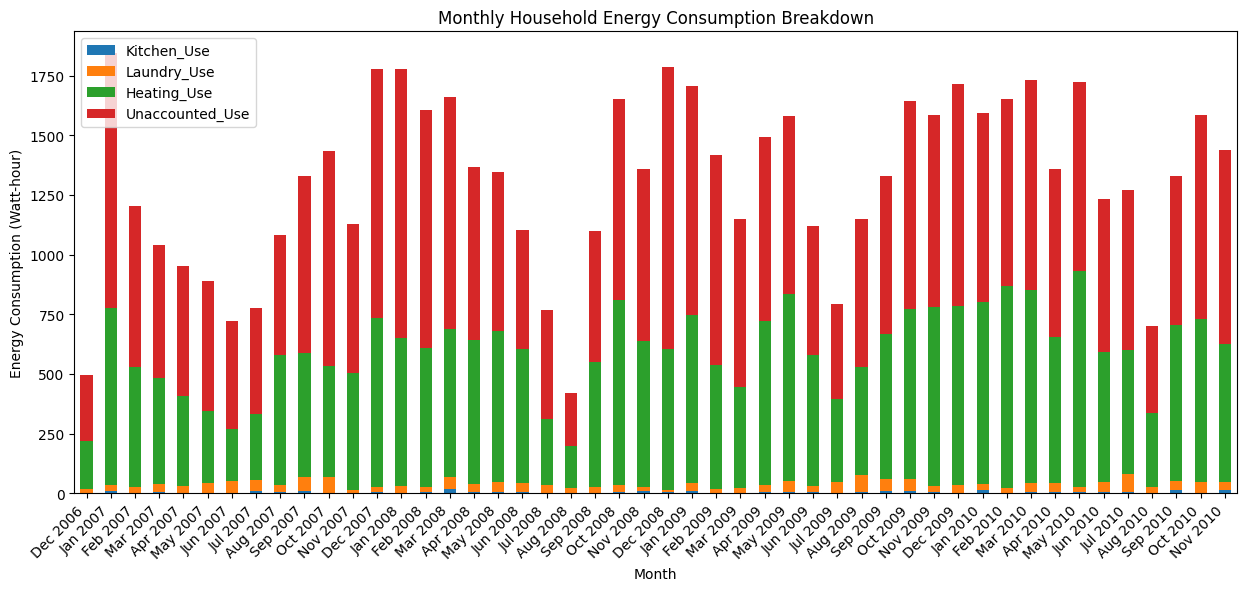

In [ ]:
# Visualizing the contribution of different readings to Total Household Energy Consumption

fig, ax = plt.subplots(figsize=(15, 6))

monthly_consumption = power_sample[['Kitchen_Use', 'Laundry_Use', 'Heating_Use', 'Unaccounted_Use' ]].resample('M').sum()
monthly_consumption.index = monthly_consumption.index.strftime('%b %Y')
monthly_consumption.plot(kind='bar', stacked=True, ax=ax)

plt.title('Monthly Household Energy Consumption Breakdown')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Watt-hour)')
plt.xticks(rotation=45, ha='right')
plt.show()


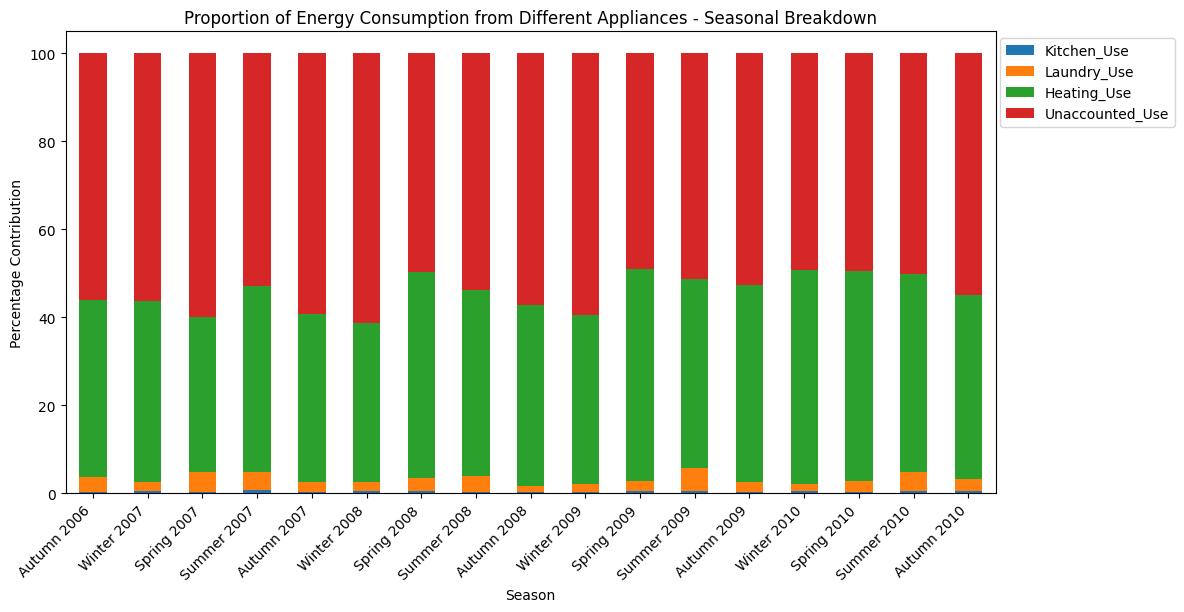

In [ ]:

# Resampling based on seasonal interval and summing up the energy readings

seasonal_consumption = power_sample[['Kitchen_Use', 'Laundry_Use', 'Heating_Use', 'Unaccounted_Use', 'Total_Household_Consumption']].resample('Q').sum()

percentage_contributions_seasonal = seasonal_consumption[['Kitchen_Use', 'Laundry_Use', 'Heating_Use', 'Unaccounted_Use']].\
div(seasonal_consumption['Total_Household_Consumption'], axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))
percentage_contributions_seasonal.plot(kind='bar', stacked=True, ax=ax)

season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
season_labels = [f'{season_names[quarter]} {year}' for quarter, year in zip(seasonal_consumption.index.quarter, seasonal_consumption.index.year)]

plt.title('Proportion of Energy Consumption from Different Appliances - Seasonal Breakdown')
plt.xlabel('Season')
plt.ylabel('Percentage Contribution')
plt.xticks(range(len(seasonal_consumption)), season_labels, rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


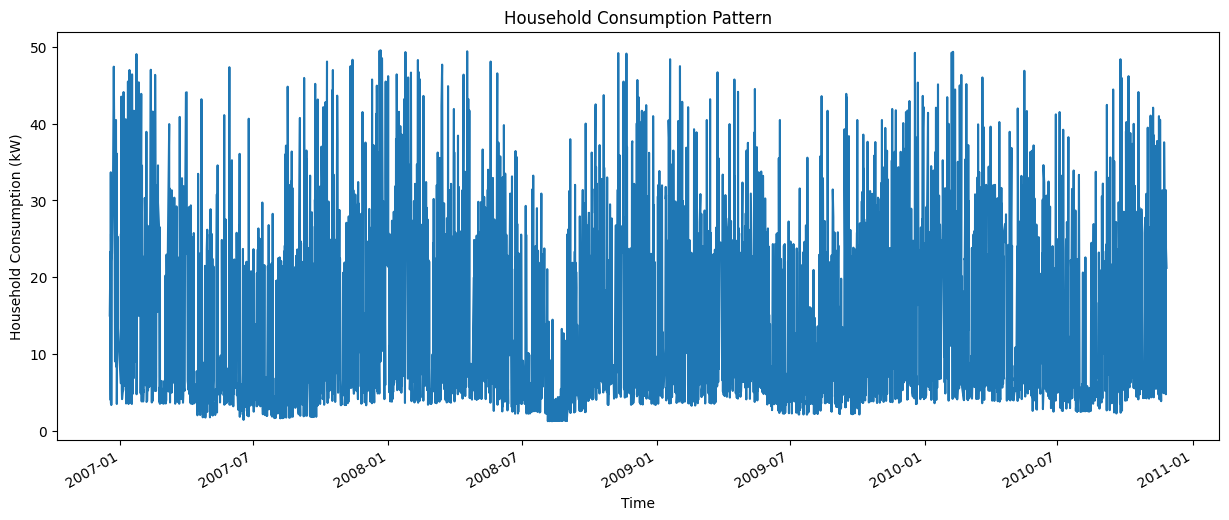

In [ ]:
# Plotting consumption over time

plt.figure(figsize=(15, 6))
power_sample['Total_Household_Consumption'].plot(title='Household Consumption Pattern')
plt.xlabel('Time')
plt.ylabel('Household Consumption (kW)')
plt.show()

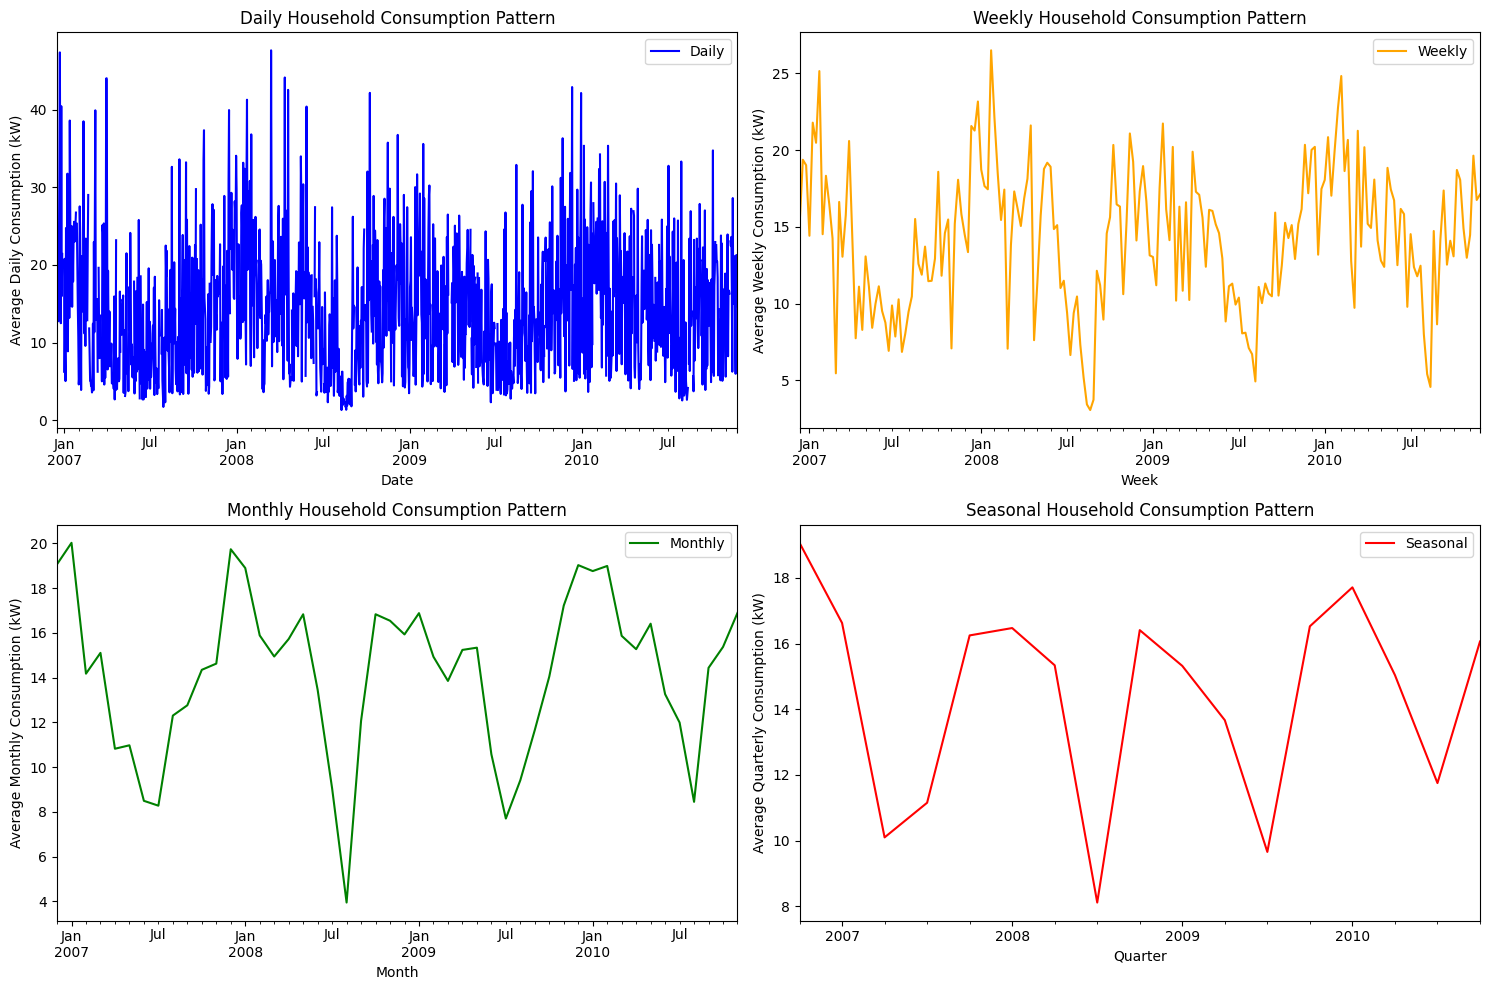

In [ ]:
# Resampling using different time intervals
daily_pattern = power_sample['Total_Household_Consumption'].resample('D').mean()
weekly_pattern = power_sample['Total_Household_Consumption'].resample('W').mean()
monthly_pattern = power_sample['Total_Household_Consumption'].resample('M').mean()
seasonal_pattern = power_sample['Total_Household_Consumption'].resample('Q').mean()


# Plotting all patterns together
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
daily_pattern.plot(title='Daily Household Consumption Pattern', label='Daily', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Daily Consumption (kW)')
plt.legend()

plt.subplot(2, 2, 2)
weekly_pattern.plot(title='Weekly Household Consumption Pattern', label='Weekly', color='orange')
plt.xlabel('Week')
plt.ylabel('Average Weekly Consumption (kW)')
plt.legend()

plt.subplot(2, 2, 3)
monthly_pattern.plot(title='Monthly Household Consumption Pattern', label='Monthly', color='green')
plt.xlabel('Month')
plt.ylabel('Average Monthly Consumption (kW)')
plt.legend()

plt.subplot(2, 2, 4)
seasonal_pattern.plot(title='Seasonal Household Consumption Pattern', label='Seasonal', color='red')
plt.xlabel('Quarter')
plt.ylabel('Average Quarterly Consumption (kW)')
plt.legend()

plt.tight_layout()
plt.show()


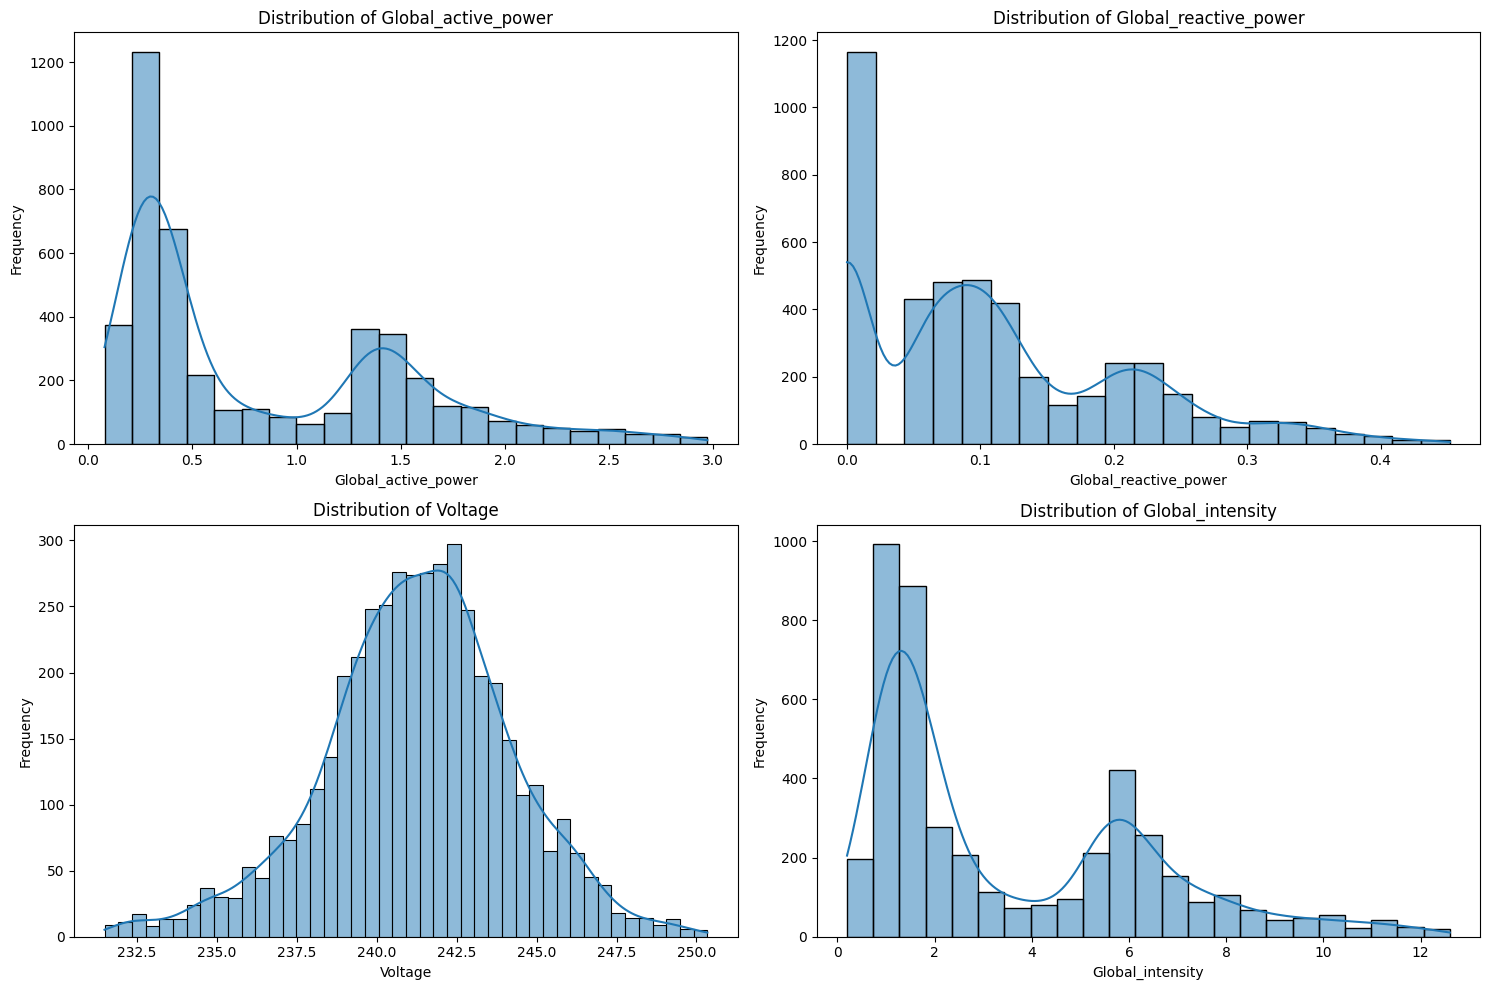

In [ ]:
# Selecting variables
distribution_vars = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Plotting distributions
plt.figure(figsize=(15, 10))
for i, var in enumerate(distribution_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(power_sample[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

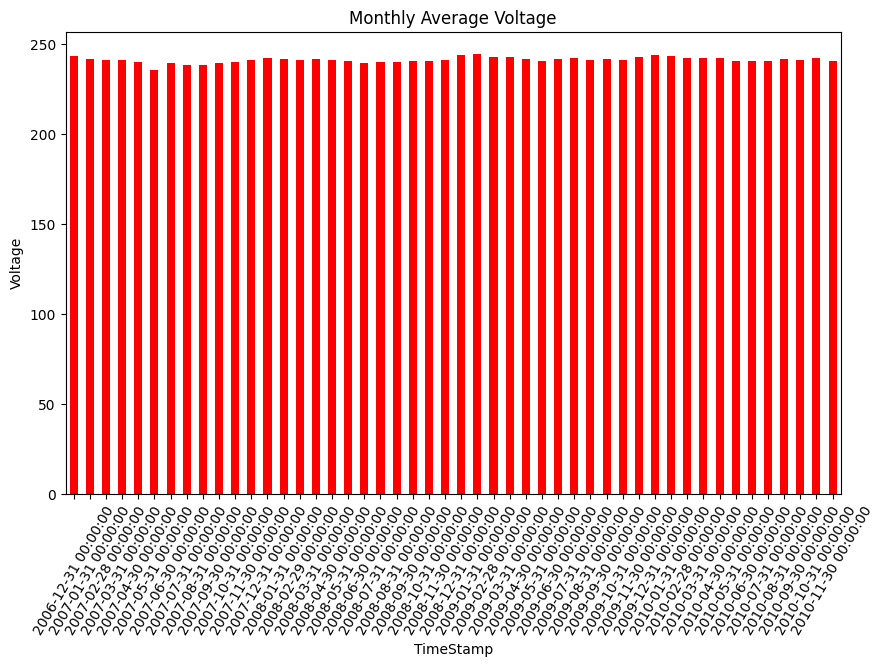

In [ ]:
# Visualzing mean of 'Voltage' resampled over months

plt.figure(figsize=(10, 6))
power_sample['Voltage'].resample('M').mean().plot(kind='bar', color='red')

plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Monthly Average Voltage')
plt.show()

##### **Observation**:
It can be observed from the above plot that the mean of 'Voltage' over monthly periods is pretty much constant compared to other features.

#### **Correlation Analysis**

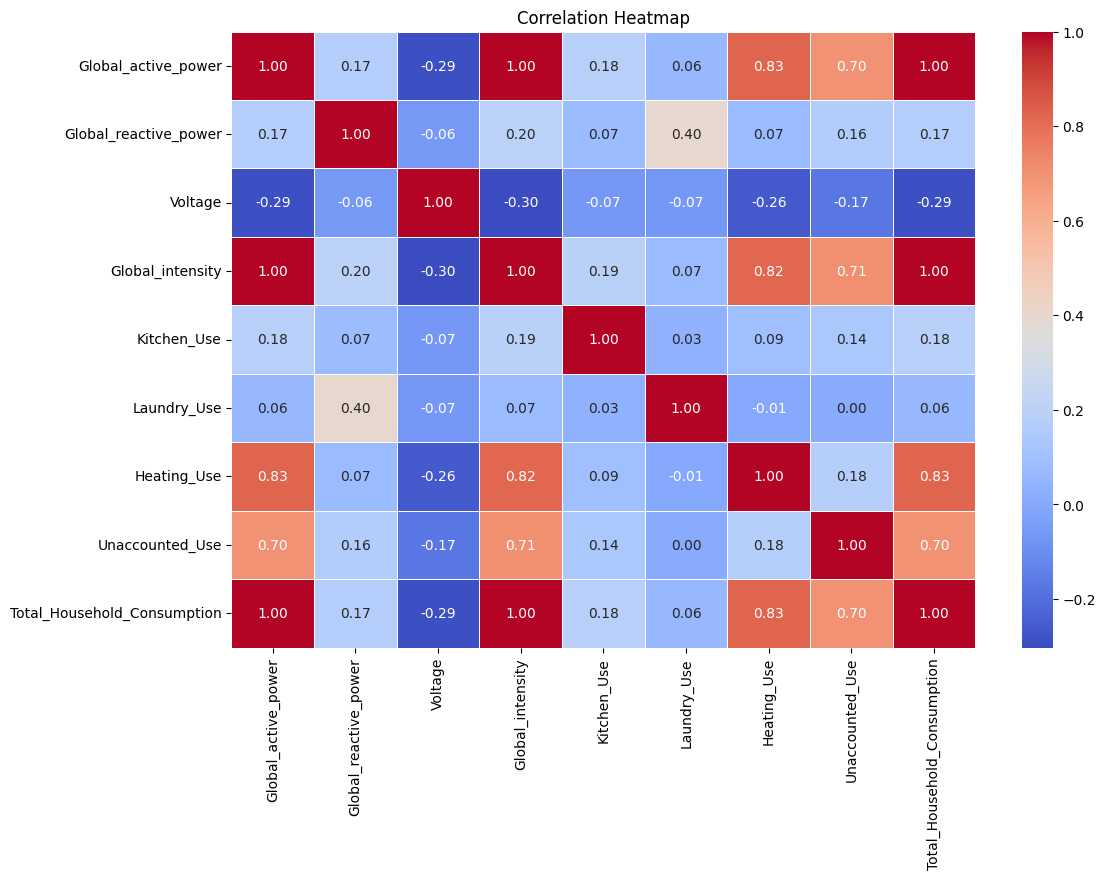

In [ ]:
# Plotting the correlation heatmap

correlation_variables = power_sample.iloc[:, 0:9]

correlation_matrix = correlation_variables.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

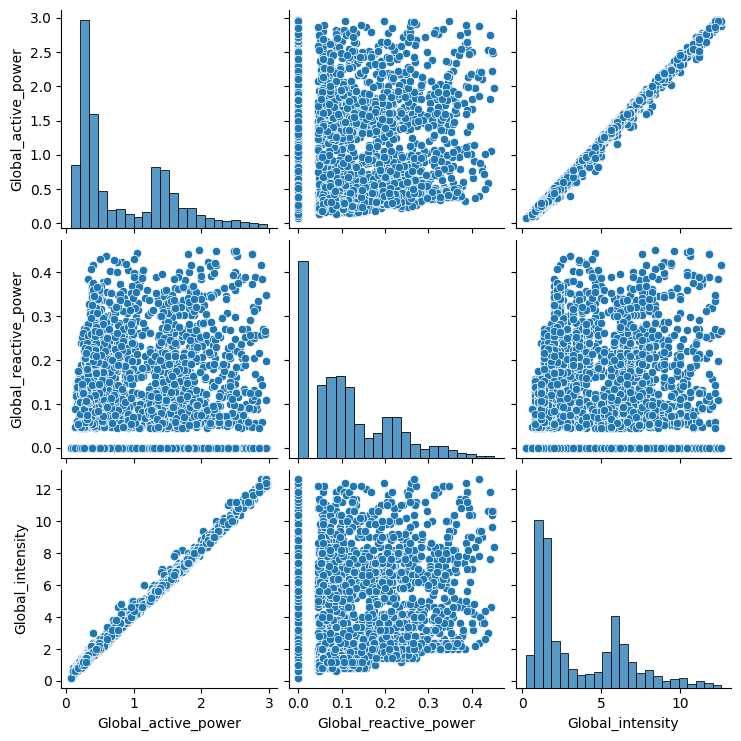

In [ ]:
sns.pairplot(power_sample.iloc[:, [0,1,3]])

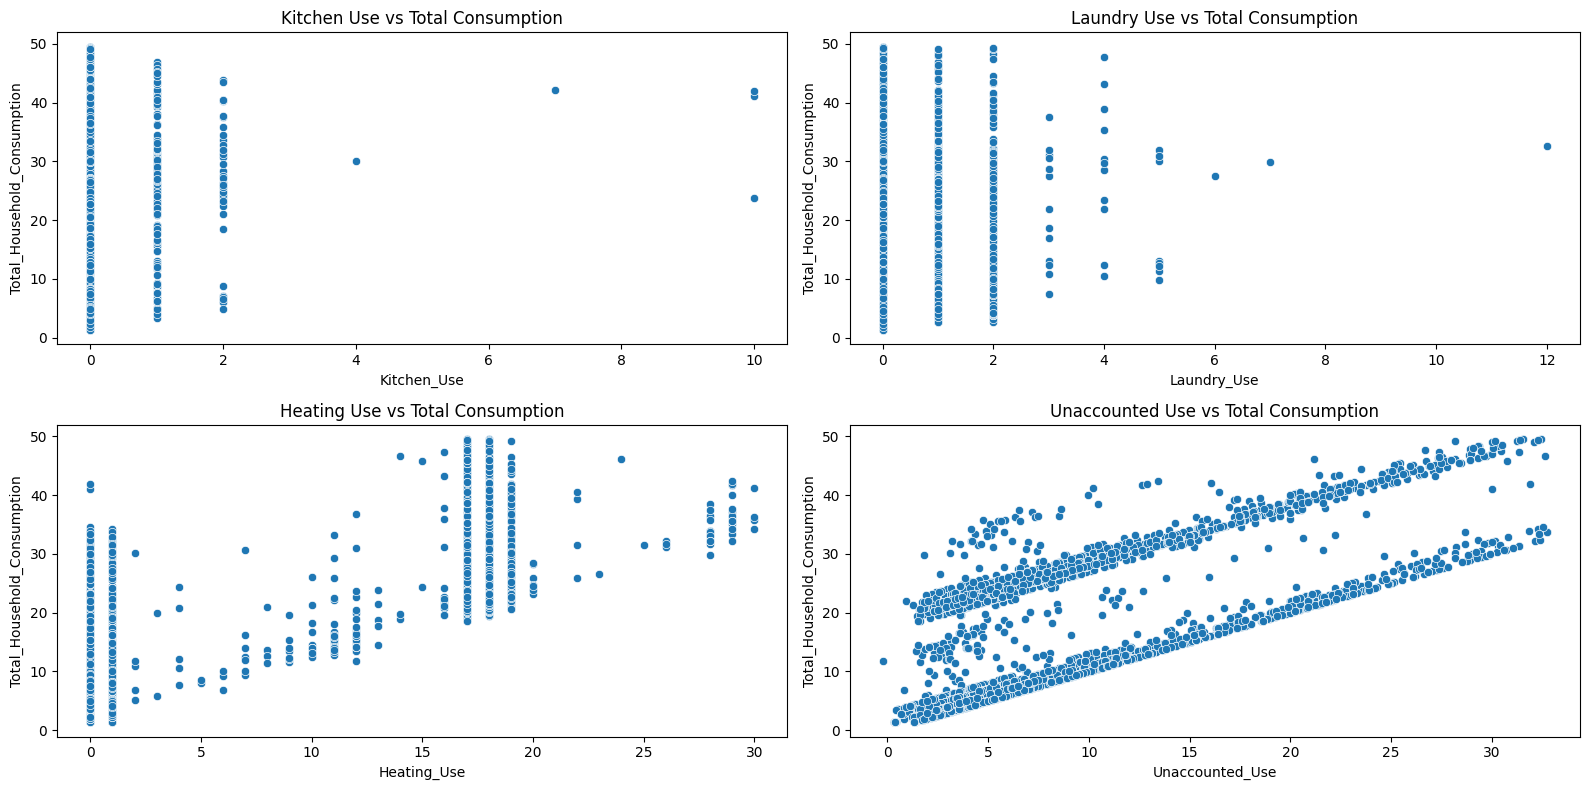

In [ ]:

# Exploring the relationship between sub-metering readings and total household consumption

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Kitchen_Use', y='Total_Household_Consumption', data=power_sample)
plt.title('Kitchen Use vs Total Consumption')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Laundry_Use', y='Total_Household_Consumption', data=power_sample)
plt.title('Laundry Use vs Total Consumption')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Heating_Use', y='Total_Household_Consumption', data=power_sample)
plt.title('Heating Use vs Total Consumption')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Unaccounted_Use', y='Total_Household_Consumption', data=power_sample)
plt.title('Unaccounted Use vs Total Consumption')

plt.tight_layout()
plt.show()


#### **Standardizing the Dataset**

In [ ]:
power_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4469 entries, 2010-07-07 18:10:00 to 2010-11-08 02:43:00
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Global_active_power          4469 non-null   float64
 1   Global_reactive_power        4469 non-null   float64
 2   Voltage                      4469 non-null   float64
 3   Global_intensity             4469 non-null   float64
 4   Kitchen_Use                  4469 non-null   float64
 5   Laundry_Use                  4469 non-null   float64
 6   Heating_Use                  4469 non-null   float64
 7   Unaccounted_Use              4469 non-null   float64
 8   Total_Household_Consumption  4469 non-null   float64
 9   hour_of_day                  4469 non-null   int64  
 10  day_of_week                  4469 non-null   int64  
 11  month_of_year                4469 non-null   int64  
 12  season                       4469 non-nu

In [ ]:
# Selecting relevant features for clustering
selected_features = ['Global_active_power',
    'Global_reactive_power',
    'Global_intensity',
    # 'Voltage',
    'Kitchen_Use',
    'Laundry_Use',
    'Heating_Use',
    'Unaccounted_Use']

X = power_sample[selected_features]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

#### **KMeans Algorithm**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

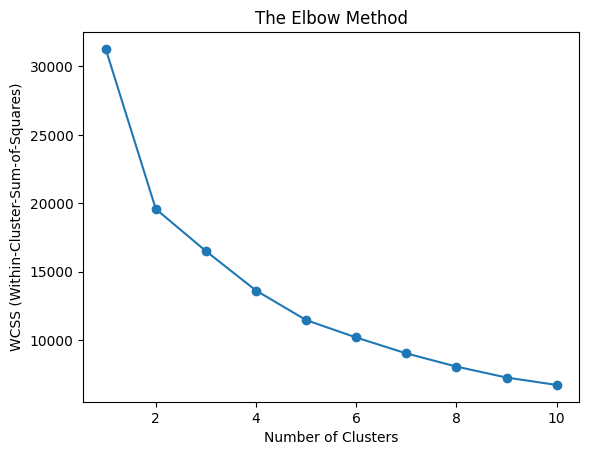

In [ ]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')

plt.show()


In [ ]:
# Reducing the dimensionality in the dataset

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.46644284, 0.19618144])

In [ ]:
sum(pca.explained_variance_ratio_)

0.6626242765529351

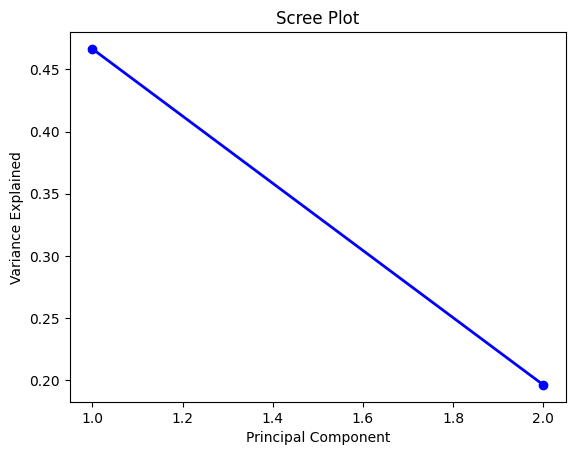

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_pca)

# Adding a 'Clusters' column to the main dataframe
power_sample['Clusters'] = y_kmeans + 1


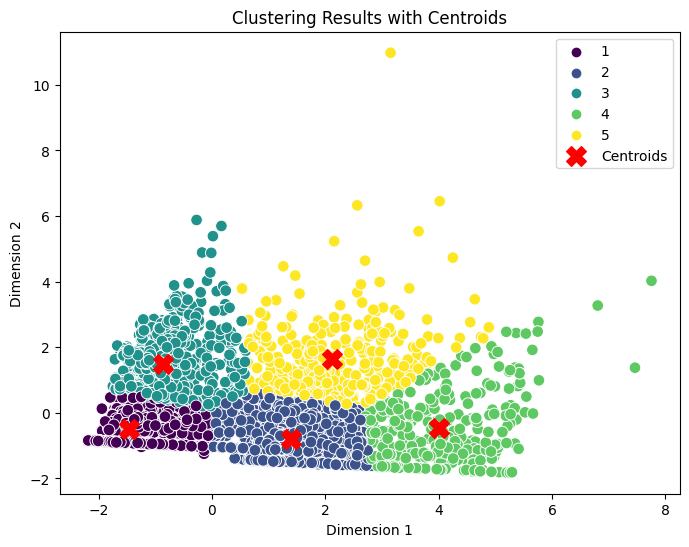

In [ ]:
# Visualizing the clusterings

plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=power_sample['Clusters'], palette='viridis', s=70)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.title('Clustering Results with Centroids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

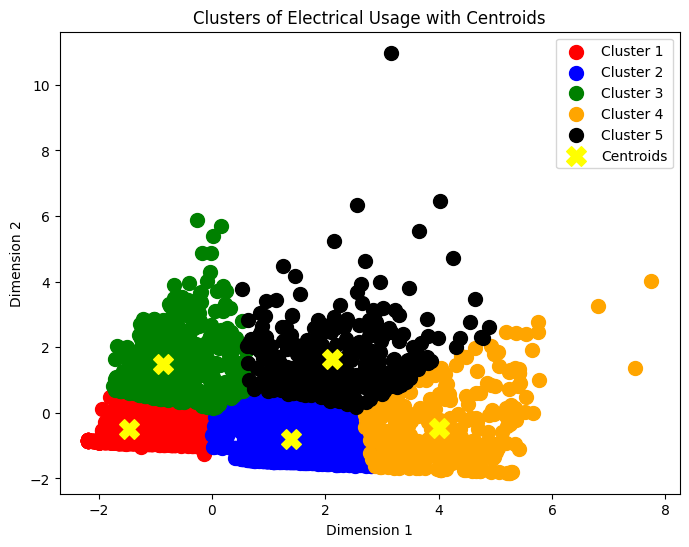

In [ ]:

colors = ['red', 'blue', 'green', 'orange', 'black']

plt.figure(figsize=(8, 6))

for i in range(5):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],
                s=100, c=colors[i], label='Cluster ' + str(i + 1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='X', label='Centroids')

plt.title('Clusters of Electrical Usage with Centroids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

##### Evaluating the model

Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

labels = kmeans.labels_
silhouette_value = silhouette_score(X_pca, labels)
print(f"The Silhouette Score is: {silhouette_value}")

The Silhouette Score is: 0.5313223555745634


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculating the Davies-Bouldin Index

labels = kmeans.labels_

labelstable = pd.DataFrame(labels)

db_index = davies_bouldin_score(X_pca, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.735940765262392


#### Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as sch

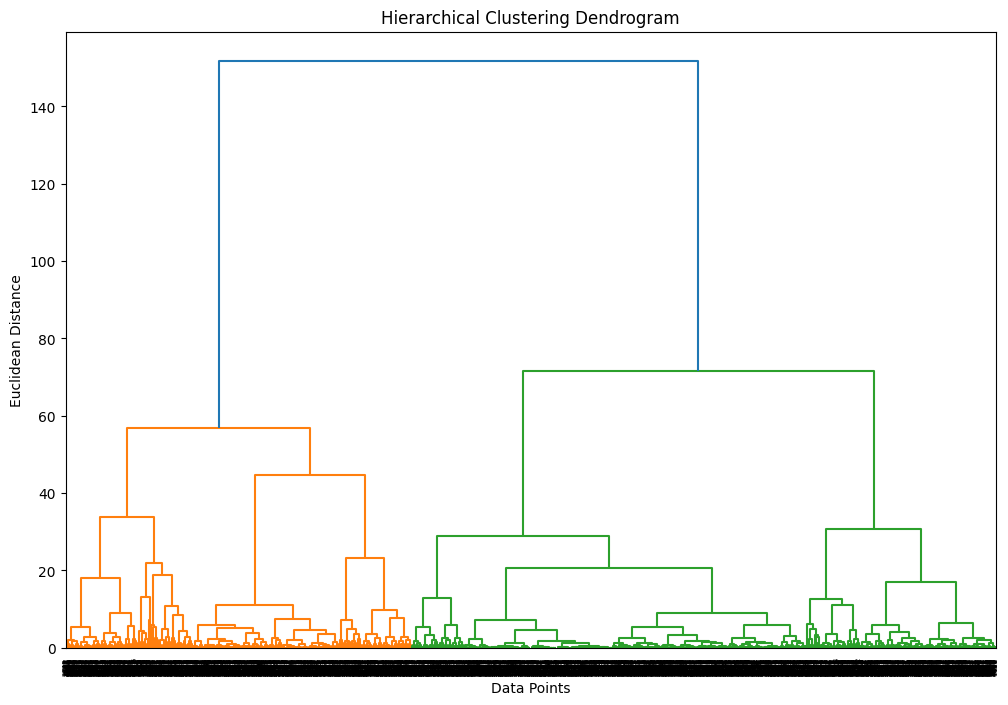

In [ ]:
plt.figure(figsize=(12, 8))

dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
# Fitting the hierachichal clustering to the dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X_pca)

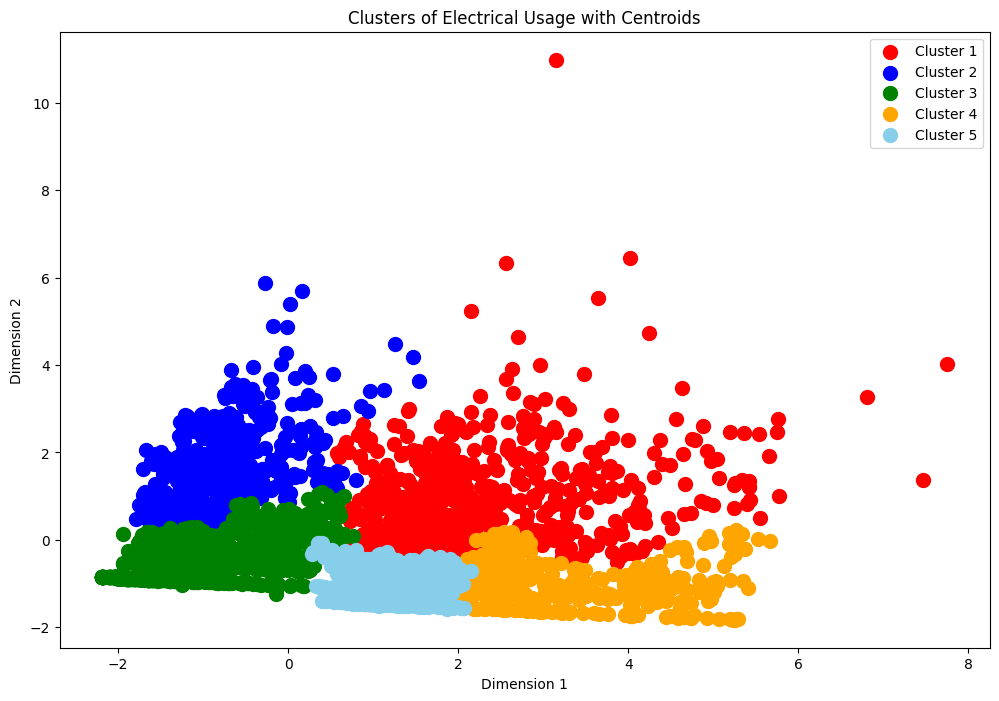

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'skyblue']

plt.figure(figsize=(12, 8))

for i in range(5):
    plt.scatter(X_pca[y_hc == i, 0], X_pca[y_hc == i, 1],
                s=100, c=colors[i], label='Cluster ' + str(i + 1))

plt.title('Clusters of Electrical Usage with Centroids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

##### **Davies-Bouldin Index**

In [ ]:
model = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

labels = model.fit_predict(X_pca)

db_index = davies_bouldin_score(X_pca, labels)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.8779340093083862


In [ ]:
# model = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

# labels = model.fit_predict(X_pca)

# labelstable = pd.DataFrame(labels)

# db_index = davies_bouldin_score(X_pca, labels)
# print(f"Davies-Bouldin Index: {db_index}")


### **Clusters Interpretation**


In [ ]:
power_sample

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_Use,Laundry_Use,Heating_Use,Unaccounted_Use,Total_Household_Consumption,hour_of_day,day_of_week,month_of_year,season,Clusters
TimeStamp,,,,,,,,,,,,,,
2010-07-07 18:10:00,0.256,0.106,242.00,1.2,0.0,0.0,1.0,3.266667,4.266667,18,2,7,2,1
2007-05-14 06:50:00,0.466,0.352,237.22,2.4,0.0,2.0,0.0,5.766667,7.766667,6,0,5,1,3
2007-09-26 18:10:00,0.758,0.194,238.66,3.2,0.0,1.0,0.0,11.633333,12.633333,18,2,9,3,3
2007-06-19 07:30:00,1.290,0.046,240.64,5.4,1.0,0.0,18.0,2.500000,21.500000,7,1,6,2,2
2010-05-10 04:43:00,0.428,0.202,242.23,1.8,0.0,2.0,1.0,4.133333,7.133333,4,0,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-10-31 18:09:00,0.272,0.000,244.31,1.0,0.0,0.0,1.0,3.533333,4.533333,18,6,10,3,1
2008-09-18 00:34:00,0.248,0.124,242.77,1.2,0.0,2.0,1.0,1.133333,4.133333,0,3,9,3,3
2007-03-22 17:07:00,0.294,0.106,243.03,1.2,0.0,1.0,0.0,3.900000,4.900000,17,3,3,1,3


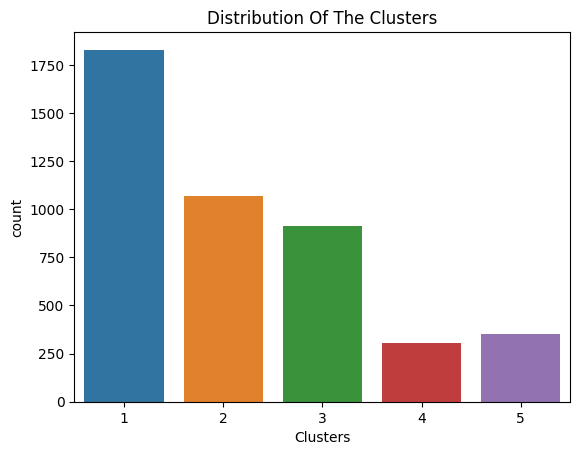

In [ ]:
pl = sns.countplot(x=power_sample["Clusters"])

pl.set_title("Distribution Of The Clusters")
plt.show()

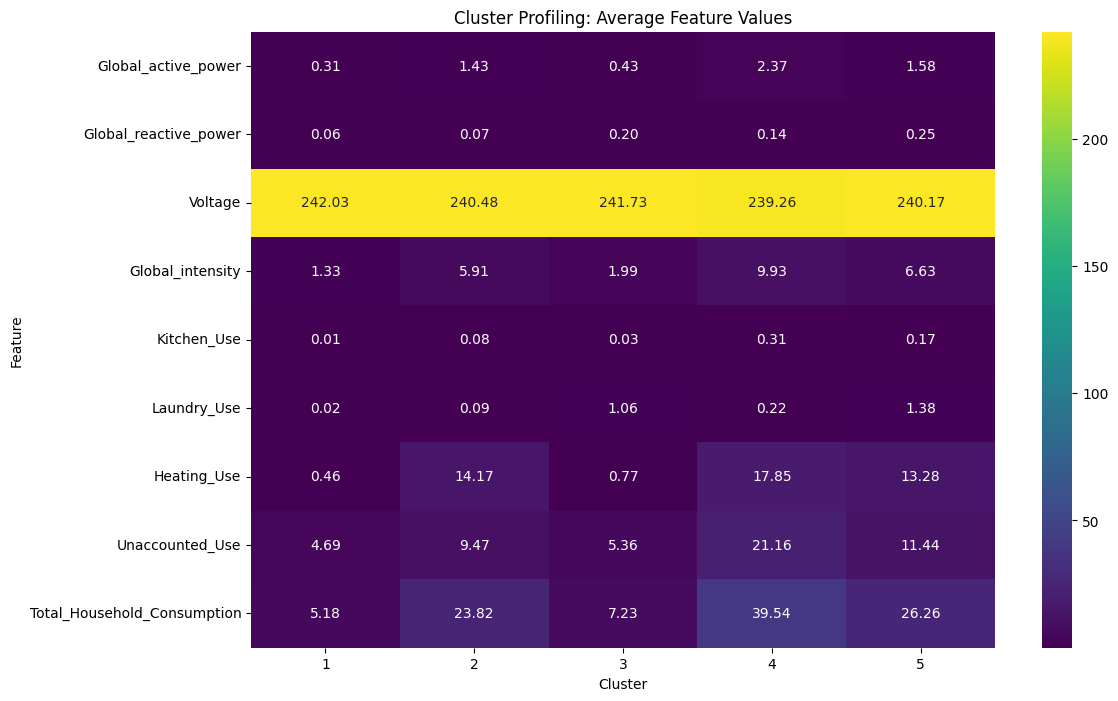

In [ ]:
# Visualizing the Cluster Profiles by their average values
cluster_means = power_sample.drop(columns=['hour_of_day', 'day_of_week', 'month_of_year', 'season'], axis=1).groupby('Clusters').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cluster Profiling: Average Feature Values')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

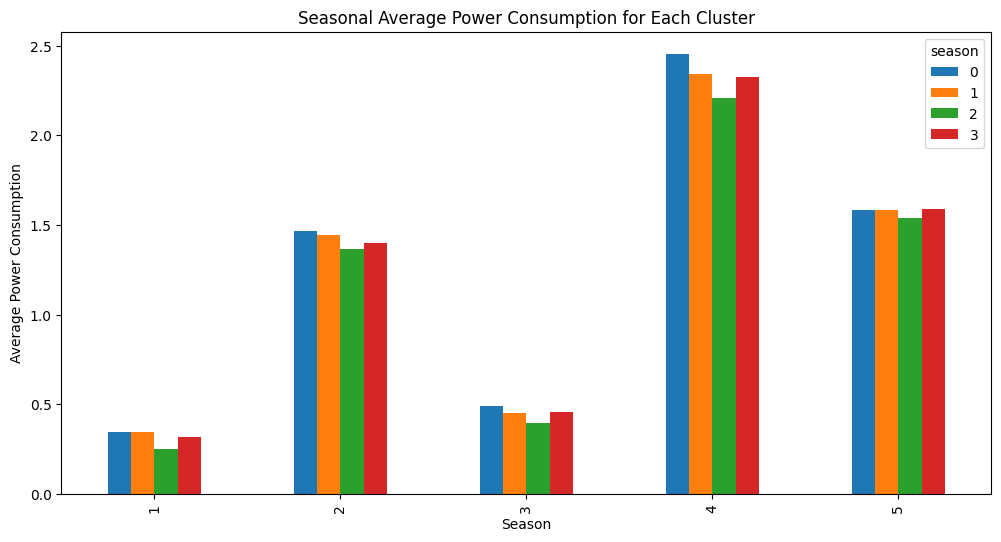

In [ ]:
# Visualizing the average consumption per season for each cluster
seasonal_means = power_sample.groupby(['Clusters', 'season']).mean()

seasonal_means['Global_active_power'].unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Seasonal Average Power Consumption for Each Cluster')
plt.ylabel('Average Power Consumption')
plt.xlabel('Season')
plt.show()


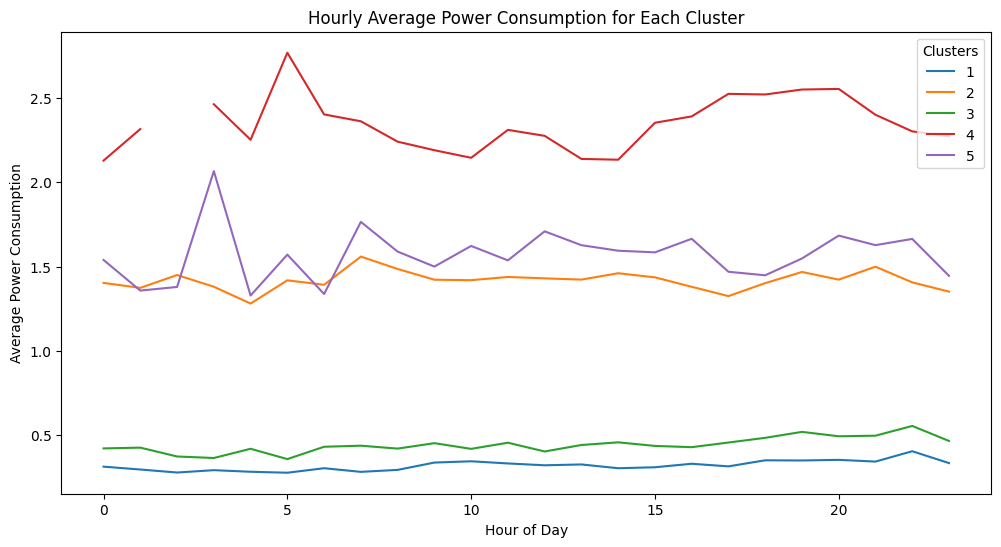

In [ ]:
# Visualize the average consumption per hour for each cluster

hourly_means = power_sample.groupby(['hour_of_day', 'Clusters']).mean()

hourly_means['Global_active_power'].unstack().plot(kind='line', figsize=(12, 6))

plt.title('Hourly Average Power Consumption for Each Cluster')
plt.ylabel('Average Power Consumption')
plt.xlabel('Hour of Day')

plt.show()